#### <a id='top'></a>

# Homework 3: Conditional Probability and Random Choice 
***

**Name**: Aanvi Guliani

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 21**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (25 pts) Problem 1: Theory (Independence)

In the popular video game series Pokémon, players conduct battles between their pokémon (creatures). In the main series of games, these battles are [turn-based](#https://en.wikipedia.org/wiki/Turns,_rounds_and_time-keeping_systems_in_games#Turn-based), similar to a game of checkers, chess, or Go.

Let's create a new set of rules for a pokémon duel so they don't have to battle until they faint. For our example, we will look at Pikachu vs. Eevee. Pikachu has a higher base Speed, so they will get to move first.

* The duel is composed of an unknown number of rounds (same as Pokémon).
* Each round is still turn-based, it consists of Pikachu trying to strike Eevee, then Eevee trying to strike Pikachu.
* If Pikachu manages to strike Eevee, then Pikachu is awarded a point, and similarly if Eevee manages to strike Pikachu, then Eevee is awarded a point.
* If a round ends in a tie, then Pikachu and Eevee proceed to another round. If a round ends with one pokémon scoring a point but the other one does not, then the pokémon who scored a point wins the duel.

Let $U$ be the event that "Picachu wins the duel", $F$ be the event that "the duel ends after the first round of strikes", and $C$ be the event that "the duel continues after the first round of strikes".  Suppose that the result of one strike is independent of the other strikes, Picachu successfully lands their strikes with probability $p$ (based on their accuracy and Eevee's evasiveness), and Eevee similarly lands their strikes with probability $q$.

**Part A**: The duel will continue until Pikachu or Eevee wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual strikes by $H$ for a hit and $M$ for a miss. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

HINT: Remember that Pikachu has the first strike in each round!

**Answer**  
Since the duel continues until Pikachu or Eevee wins, the outcome is the the hits / misses. For round 1, there are 4 outcomes. Either they both hit, they both miss, or one hits and the other misses. For round 2, there are 8 outcomes. They are four strikes in each possible outcome (with round 1 strikes appended to round 2 strikes). Since the only outcomes that would lead to a second round are both hits or both misses (essentially a tie in round 1), the two strikes from round 1 must be HH or MM. These are appended to the possible round 2 strikes (HH, MM, MH, or HM). Thus, the sample space is as follows:    
$$Ω = \{(HH)(HM)(MH)(MM),(HHHH)(HHHM)(HHMH)(HHMM)(MMHH)(MMHM)(MMMH)(MMMM),...\}$$

**Part B**: Determine $P(U \mid F)$ in terms of $p$ and $q$.

**Answer**  
$U$ and $F$ are independent events, so $P(U \mid F) = P(U\cap F)/P(F)$. $P(U\cap F)$ is the probability that Pikachu wins the duel in the first round, and to win the duel, Pikachu must land a strike and Evee cannot land a strike. Since $p$ is the probability that Pikachu lands a strike and $p$ is the probability that Evee lands a strike, we must find $p$ AND $\neg q$. Knowing this, the probability is as follows:  
$$P(U \mid F) = \frac{p (1- q)}{P(F)}$$  

However, we also know that P(F) is the probability of HM + the probability of MH, which is:  
$$p(1 - q) + q(1 - p)$$  

Subbing this in for P(F), we get:

$$\fbox{P(U $\mid$ F) = $\frac{p (1- q)}{p(1 - q) + q(1 - p)}$}$$  

**Part C**: Explain why events $C$ and $U$ are independent. 

**Answer**  
Two events are independent if the outcome of one event does not affect the outcome of the other. If a duel continues to the next round, the "score" resets. If a duel continues (in other words, ends in a tie), the next round is not affected by the fact that the previous duel ended in a tie. Thus, the probability that Picachu wins a duel is not affected if the duel continues for another round, and $C$ and $U$ are independent events.

**Part D**: Use the Law of Total Probability to show that $P(U) = p(1-q) + (2pq - p - q +1) ~P(U \mid C)$. 

**Answer**  
The law of total probability states that if $C_1, C_2, ... C_n$ are disjoint events such that $C_1 \cup C_2 \cup ... C_n = Ω$ , 
$$P(A) = P(A\mid C_1)P(C_1) + P(A\mid C_2)P(C_2) + ... P(A\mid C_n)P(C_n)$$  
We know that either the duel will continue past the first round or it will end after the first round, so we know that $$F + U = Ω$$  
Using this, we know that
$$P(U) = P(U\mid F)P(F) + P(U\mid C)P(C)$$  
Using what we found in part B, we know that $P(U\mid F) = p(1 - q)/P(F)$, so we sub this into our law of total probability equation.  

$$P(U) = \frac{p(1 - q)}{P(F)}P(F) + P(U\mid C)P(C)$$  
$$P(U) = p(1 - q) + P(U\mid C)P(C)$$ 

We also know that P(C) = 1 - P(F) and we know that P(F) = p(1 - q) + q(1 - p), so we can calculate P(C) as follows:
$$P(C) = 1 - [p(1 - q) + q(1 - p)]$$ 
$$P(C) = 1 - [p - pq + q - pq]$$ 
$$P(C) = 1 - [p + q - 2pq]$$ 
$$P(C) = 1 - p - q + 2pq$$ 
$$P(C) = 2pq - p - q + 1$$
  
We can now sub in this value for P(C) in our law of total probability equation:  
$$\textbf{P(U) = p(1 - q) + (2pq - p - q +1)P(U $\mid$ C)}$$

Using the law of total probability, we have proved that $P(U) = p(1-q) + (2pq - p - q +1) ~P(U \mid C)$

**Part E**: Use the fact from **Part B** that $P(U \mid C) = P(U)$ to determine $P(U)$ in terms of $p$ and $q$.

**Answer**  
Knowing that that $P(U \mid C) = P(U)$, we must find $P(U)$. 

Using the law of total probability equation, we know that $$P(U) = P(U\mid F)P(F) + P(U\mid C)P(C)$$  

Let's sub in $P(U$) for $P(U \mid C)$  $$P(U) = P(U\mid F)P(F) + P(U)P(C)$$
  
Put like terms on one side and simplify:  $$P(U) - P(U)P(C) = P(U\mid F)P(F)$$  
$$P(U)[1 - P(C)] = P(U\mid F)P(F)$$  
$$P(U) = \frac{P(U\mid F)P(F)}{1 - P(C)}$$  

We know that $1 - P(C) = P(F)$, so sub that in and simplify.
$$P(U) = \frac{P(U\mid F)P(F)}{P(F)}$$  
$$P(U) = P(U\mid F)$$

We found in part B that $P(U \mid F) = P(U \mid F) = \frac{p (1- q)}{p(1 - q) + q(1 - p)}$, so:  
$$\fbox{P(U) = $\frac{p (1- q)}{p(1 - q) + q(1 - p)}$}$$  

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

**Answer**  
The answers to B and E are the same because $U$ and $C$ and $U$ and $F$ are independent from each other. Whether or not the duel continues past the first round has no effect on the probability of Picachu winning the duel, so the probabilities are equal. $P(U) = P(U \mid F) = P(U \mid C)$

**Part G**: Explain the significance of the solution technique for $P(U)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(U)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

**Answer**  
Part D doesn't assume independence while part E assumes that U and C are independent. This is why part D went in a different direction instead of computing P(U) directly. 

[Back to top](#top)
<a id='p2'></a>

## (30 pts) Problem 2: Computation (Joker Poker Hands)
***


A common example for discrete counting and probability questions are poker hands.  Consider using a standard 52-card playing deck, with card faces `[A,2,3,4,5,6,7,8,9,10,J,Q,K]` across the standard 4 suits: `[C,D,H,S]`.  For the markdown portions of this problem, you may leave your answer in terms of a ratio of products, but you should simplify away any combinatoric notation such as ${n \choose k}$ or $P(n,k)$.

**Part A:**

Suppose we draw 5 cards at random from the deck.  What is the probability that we have a "3 of a kind:" a hand with 3 copies of one face card and the other two cards unmatched?

**Answer**  
If we have to draw 5 cards, there are ${52 \choose 5}$ combinations total. This will serve as our denominator for the probability.  
  
Now we have to find how many total combinations there are to get a 3 of a kind. Let {a,b,c} be the three of a kind cards, and {d,e} be the other two cards (they must not equal a,b,or c). There are ${13 \choose 1}$ ways to choose a,b, and c, since for each suit, there is only one possibility of a card. For d and e, since they cannot be the same as a,b,or c, there are 12 cards to choose from, hence there are ${12 \choose 2}$ ways to pick d and e. Factoring in the choice of suits, we have 4 suits to choose for the three same cards, or ${4 \choose 3}$ ways. For d and e, there are ${4 \choose 1}$ ways.  
  
Putting this all together, the probability of 3 of a kind is as follows:  
  
$$ \frac{{13 \choose 1}{12 \choose 2}{4 \choose 3}{4 \choose 1}{4 \choose 1}}{{52 \choose 5}} $$  

$$ = \frac{54912}{2598960}$$
  
$$ = \fbox{0.02112845} $$

**Part B:**

Suppose we add a single "Joker" card to the deck.  The Joker may serve as a copy of any card in the deck, including one already in our hand.  

Suppose we draw 5 cards at random from the deck.  What is the probability that we now have "3 of a kind?"  This should now include hands with 2 copies of one face and a joker (and the other 2 as non-paired cards).

**Answer**  
If we add a single joker to the deck, we now have 53 total cards. This means that to draw 5 cards, there are ${53 \choose 5}$ combinations total.  
  
The total number of combinations to get three of a kind will equal to the total combinations to get 3 of a kind without a joker (what we found above) added to the number of combinations possible with a joker and a pair. Let {a,b} be the pair, {c} be the joker, and {d,e} be the two "throwaway" cards. Similar to the natural three pair, there are ${13 \choose 1}$ ways to choose a and b. Since there's only one joker, there's one way to pick c. For d and e, there are ${12 \choose 2}$ combinations. Factoring the choice of suits, we have ${4 \choose 2}$ ways to pick a and b (4 suits for two cards), and for d and e, there are ${4 \choose 1}$ ways.  
  
Putting this all together, the total combinations of a two of a kind and joker is as follows:  
  
$$ {13 \choose 1}{12 \choose 2}{4 \choose 2}{4 \choose 1}{4 \choose 1} $$
$$ = 82368$$  
  
Adding this to the total combinations of a natural 3 of a kind and dividing it by total combinations, the probability is as follows:  

$$ = \frac{54912+82368}{{53 \choose 5}}$$  
  
$$ = \frac{54912+82368}{2869685}$$

$$ = \fbox{0.04783800} $$

**Part C:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed.  Verify that the result is consistent with your answer to part A.

In [2]:
# this code is kind of a unsophisticated / naive simulation but it gets the job done
# three functions: draw5Cards() that returns a list of 5 randomized cards 
# checkTriple, which checks if the list has 3 of the same element
# driver() that runs draw5 and checkTriple 10k times and increments a counter if it's a 3OAK

# package to randomize card draws
import random

def draw5Cards():
    # array for entire deck - doesn't have suits but it makes it simpler to check if it's three of a kind
    cards = ['A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K']
    # declare array for drawn cards
    drawnCards = []
    
    # declare end index for random. this will decrement every time we remove an array element
    # this is to ensure that we don't pick the same card twice
    # for range 0,5 pick a random index, append the card to the drawn card list, remove the drawn card from the cards
    # list, and decrement index since the size of cards has changed
    endIndex = 51
    for i in range(0,5):
        # get index
        randIndex = random.randint(0,endIndex)
        drawnCards.append(cards[randIndex])
        cards.remove(cards[randIndex])
        endIndex = endIndex - 1
    
    return drawnCards

# function to check if three of a kind - returns boolean
def checkTriple(cards):
    for i in range(0,5):
        # loop through the cards list. check how many times cards[i] appears in cards. if it's three, immediately return true
        if(cards.count(cards[i])==3):
            return True
    return False

def driver():
    threeOfAKindHands = 0
    # loop through and draw 5 cards 1000 times, if checkTriple is true, increment the counter
    for i in range(0,10000):
        cards = draw5Cards()
        if(checkTriple(cards)):
            #print(cards)
            threeOfAKindHands += 1

    print("After running this simulation 10000 times, we got a 3 of a kind hand", threeOfAKindHands, "times.")
    probability = threeOfAKindHands/10000
    print("The probability of a 3 of a kind is:", probability)
        
driver()

After running this simulation 10000 times, we got a 3 of a kind hand 227 times.
The probability of a 3 of a kind is: 0.0227


**Part D:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck where one "Joker" card has been added.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed.   Verify that the result is consistent with your answer to part B.

In [3]:
# similar to above, this simulation has three functions
# difference in draw5Joker is that a 'JOKER' is added to the list 'cards'
def draw5Joker():
     # array for entire deck - doesn't have suits but it makes it simpler to check if it's three of a kind, add joker
    cards = ['A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K','JOKER']
    # declare array for drawn cards
    drawnCards = []
    
    # declare end index for random. this will decrement every time we remove an array element
    # this is to ensure that we don't pick the same card twice
    endIndex = 52
    for i in range(0,5):
        # get index
        randIndex = random.randint(0,endIndex)
        drawnCards.append(cards[randIndex])
        cards.remove(cards[randIndex])
        endIndex = endIndex - 1
    
    return drawnCards

# function to check if three of a kind, if there's joker in hand, check if there's 2 of a kind - returns boolean
def checkTripleJoker(cards):
    # create variable count, which tells you how many of a kind to look for in the array based on if joker in hand
    if 'JOKER' in cards:
        count = 2
    else:
        count = 3
    for i in range(0,5):
        # loop through the cards list. check how many times cards[i] appears in cards. if it's three, immediately return true
        if(cards.count(cards[i])==count):
            return True
    return False

def driverJoker():
    threeOfAKindHands = 0
    # loop through and draw 5 cards 10000 times, if checkTriple is true, increment the counter
    for i in range(0,10000):
        cards = draw5Joker()
        if(checkTripleJoker(cards)):
            #print(cards)
            threeOfAKindHands += 1

    print("After running this simulation 10000 times, we got a 3 of a kind hand", threeOfAKindHands, "times.")

    probability = threeOfAKindHands/10000
    print("The probability of a 3 of a kind is:", probability)

driverJoker()

After running this simulation 10000 times, we got a 3 of a kind hand 468 times.
The probability of a 3 of a kind is: 0.0468


**Part E:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck with four "Joker" cards added.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed. (NB: 3 unpaired cards and 2 Jokers is the new case of "3 of a kind".)

In [4]:
# similar to previous sim except 4 jokers added instead of only one
# the checkTriple is a bit different - if there's 1 joker, it checks for 2 of a kind similar to last, but if it's 2 jokers, immediately returns true
# if three jokers, three of a kind isn't possible so immediately returns false
def draw5Joker4():
     # array for entire deck - doesn't have suits but it makes it simpler to check if it's three of a kind, add joker
    cards = ['A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K',
            'A','2','3','4','5','6','7','8','9','10','J','Q','K','JOKER','JOKER','JOKER','JOKER']
    # declare array for drawn cards
    drawnCards = []
    
    # declare end index for random. this will decrement every time we remove an array element
    # this is to ensure that we don't pick the same card twice
    endIndex = 55
    for i in range(0,5):
        # get index
        randIndex = random.randint(0,endIndex)
        drawnCards.append(cards[randIndex])
        cards.remove(cards[randIndex])
        endIndex = endIndex - 1
    return drawnCards

def checkTripleJoker4(cards):
    # create variable count, which tells you how many of a kind to look for in the array based on if joker in hand
    if 'JOKER' in cards:
        jokerCount = cards.count('JOKER')
        if jokerCount == 1:
            count = 2
        else:
            if jokerCount == 2:
                return True
            else:
                return False
    else:
        count = 3
    for i in range(0,5):
        # loop through the cards list. check how many times cards[i] appears in cards. if it's three, immediately return true
        if(cards.count(cards[i])==count and cards[i] != 'JOKER'):
            return True
    return False

def driverJoker4():
    threeOfAKindHands = 0
    # loop through and draw 5 cards 1000 times, if checkTriple is true, increment the counter
    for i in range(0,10000):
        cards = draw5Joker4()
        if(checkTripleJoker4(cards)):
            #print(cards)
            threeOfAKindHands += 1

    print("After running this simulation 10000 times, we got a 3 of a kind hand", threeOfAKindHands, "times.")
    probability = threeOfAKindHands/10000
    print("The probability of a 3 of a kind is:", probability)
    
driverJoker4()

After running this simulation 10000 times, we got a 3 of a kind hand 1427 times.
The probability of a 3 of a kind is: 0.1427


[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Simulation
*** 

In this problem you will write some code to simulate the movement of budding Data Scientist Skyler - founder of infamous Skynet - as they navigate their way through the Engineering Center Lobby between classes.  Skyler has 10 minutes to navigate the labryinthine space below:

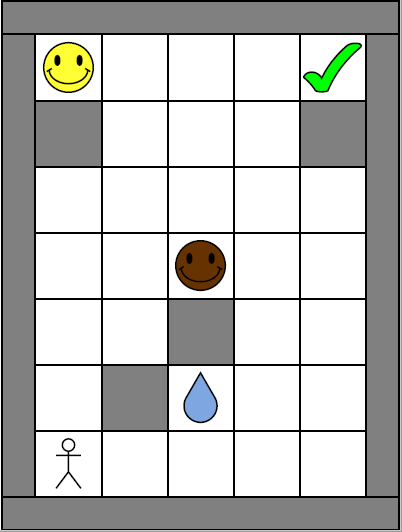

Skyler starts at the bottom left (SW) corner, a square we will refer to as $(0,0)$, and is trying to reach their next class in the top right (or NE) corner, a square at (4,6) using a standard cartesian system.

Skyler, unfortunately, is very disoriented and their movement is partly random.  1/3 of the time Skyler will try to walk North; 1/3 of the time Skyler will try to walk East, and the rest of the time Skyler will split evenly between South and West.

Your goal is to figure out what the probability is that Skyler makes it to (4,6) before running out of time, with the following hazards:

 - Skyler walks at a standard rate of 10 seconds per tile.  If Skyler walks into one of the dark-shaded walls or pillars, they remain where they started, but it still takes 10 seconds.

 - Someone spilled a foul-smelling energy drink at (2,1).  If Skyler moves into the tile in (2,1), they are completely grossed out.  They move back to the start at (0,0) and spend a little time cleaning their shoes, losing 60 additional seconds beyond the time to originally move into (2,1).
 
 - Skyler's data science professor is drinking coffee at (2,3), and Skyler hasn't turned in their homework for a week and a half.  If Skyler walks to that tile, they suffer through some tedious conversation and then shuffle *backwards* from where they came by an extra tile, so if they encountered the professor in a movement from (1,3) to (2,3) they would recoil back to (0,3).  This entire process takes 90 seconds, including all movement.
 
 - Skyler's best friend and coding collaborator is at (0,6).  Should Skyler walk there, they will engage in a lengthy conversation, taking 120 seconds, including all movement.



<br>

**Part A**: Complete the function sky_step below. The function should simulate one step of Skyler's.  It should take as arguments the Skyler's current location on the board as well as the the time elapses, and return Skyler's new location and time elapses after the movement has completed. Note that if Skyler runs out of time, you should return 310 and not any additional wasted time.

In [5]:
# this is also a naive implementation of the sim, instead of coordinates I implemented using a list of length 2
# I predefined locations in sky_step in list form where we would need to do extra movement / time change, and then compared
# those two lists to see if they were equal
import random
def sky_step():
    # let location be a list of length 2, location[0] is the x coordinate and location[1] is the y coordinate
    # create an array next step, which contains the next steps (N/S/E/W) with it's frequency corresponding w/ the probabilities
    next_step = ['N','N','N','N','E','E','E','E','S','S','W','W']
    time = 0
    location = [0,0]
    # define the locations where time will be added or location will be changed
    drink = [2,1]
    prof = [2,3]
    friend = [0,6]
    # define the locations where there's a grey square or nowhere to move
    s1 = [1,1]
    s2 = [3,3]
    s3 = [0,5]
    s4 = [4,5]
    
    goal = [4,6]
    # count to see if we've ran into the professor (used later)
    profCount = 0
    
    # while loop that keeps going as long as time hasn't run out and we haven't reached class
    while time <= 600 and location != goal:
        #get the next random location and increment x and y count accordingly
        rand = random.randint(0,11)
        step = next_step[rand]
        x_count = 0
        y_count = 0
        if step == 'N':
            y_count += 1
        if step == 'S':
            y_count -= 1
        if step == 'W':
            x_count -= 1
        if step == 'E':
            x_count += 1
        location[0] += x_count
        location[1] += y_count

        # check if the location is not on a grey square and that it's valid - if not valid, return to the prev. location and run through again
        if location[0] < 0 or location[0] > 4 or location[1] < 0 or location[1] > 6 or location == s1 or location == s2 or location == s3 or location == s4:
            location[0] -= x_count
            location[1] -= y_count
            time += 10
        # if the location is drink, add 60 seconds and reset to 0,0 location
        elif location == drink:
            time += 60
            location[0] = 0
            location[1] = 0
        # if location is professor, increment profCount, add 90 seconds, and step back two steps (but step back only 1 if two steps is invalid)
        elif location == prof:
            profCount += 1
            time += 90
            newLocation = [0,0]
            # go back two steps in the direction you came from, as long as it's valid
            if step == 'N':
                newLocation = [location[0],location[1]-2]
                if newLocation[1] >= 0 and newLocation != s1 and newLocation != s2 and newLocation != s3 and newLocation != s4:
                    location[1] -= 2
                else:
                    location[1] -= 1
            elif step == 'S':
                newLocation = [location[0],location[1]+2]
                if newLocation[1] <= 6 and newLocation != s1 and newLocation != s2 and newLocation != s3 and newLocation != s4:
                    location[1] += 2
                else:
                    location[1] += 1
            elif step == 'W':
                newLocation = [location[0]+2,location[1]]
                if newLocation[0] <= 4 and newLocation != s1 and newLocation != s2 and newLocation != s3 and newLocation != s4:
                    location[0] += 2
                else:
                    location[0] += 1
            elif step == 'E':
                newLocation = [location[0]-2,location[1]]
                if newLocation[0] >= 0 and newLocation != s1 and newLocation != s2 and newLocation != s3 and newLocation != s4:
                    location[0] -= 2
                else:
                    location[0] -= 1
        # if location is friend, add 120 seconds
        elif location == friend:
            time += 120
        # normal square, add 10 seconds
        else:
            time += 10
    # boolean value for profCount (used a counter instead of a boolean initially because values would change in the loop)
    if profCount >= 1:
        isProf = True
    else:
        isProf = False
    # if over time, return 310 along with location and isProf
    if time >= 600 or location != goal:
        return location,310,isProf
    # else, return values normally
    return location, time, isProf

    
    

**Part B**: Use your function from **Part A** to simulate at least 10000 of Skyler's 10-minute trips through the Engineering Lobby and make a frequency histogram of the Skyler's time elapsed at the end of your simulation (including instances where they did not make it in time).

In [6]:
#Simulation for Part B
location = 0
time = 0
timeArray = []
isReached = []
count = 0
profAndReached = 0
profCount = 0

# run through 10k times, append values of time and ifReached to a list
# for profcount, if prof. was met and reached in time, increment profAndReached and profCount, else, if is prof, only increment profCount
# ^ these will be used later
for i in range(0,10000):
    location,time,isProf = sky_step()
    timeArray.append(time)
    if location == [4,6] and time <= 600:
        if(isProf):
            profAndReached += 1
            profCount += 1
        isReached.append(1)
        count += 1
    else:
        if(isProf):
            profCount += 1
        isReached.append(0)
# create a data frame in pandas with the timeArray and isReached to create a histogram later
df = pd.DataFrame({'time':timeArray, 'reached':isReached})

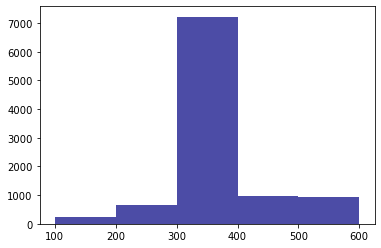

In [11]:
#Frequency histogram
my_bins = range(100,700,100)
reached = df['time']
notReached = df[df['reached'] == 0]['time']

# use matplotlib to plot the histogram with alpha of .7 to make slightly transparent
plt.hist(reached, my_bins, color='navy', alpha=0.7)
#plt.hist(notReached, my_bins, label='Did not Reach', color = 'skyblue', alpha=0.7)
#plt.legend(loc='upper right')
plt.show()

**Part C**: Use your code from **Part A** to estimate the probability that Skyler makes it to class on time.

In [8]:
# in the loop, we had a variable called count, which counted the number of times isReached is true
probability = count / 10000
print("The probability that Skyler makes it to class on time is:", probability)

The probability that Skyler makes it to class on time is: 0.3819


**Part D**: Use your code from **Part A** to estimate the probability that Skyler makes it to class on time _given_ that they talked to their Data Science professor.  Is Skyler more or less likely to make it on time if they talk to their Data Science Professor?

**Answer**  
Based on the code output below, it looks like Skyler is less likely to make it on time if they talked to their data science professor.

In [9]:
# edit code for part A to add a boolean variable of whether or not they landed on the square for the data science professor
# then calculate the conditional probability (P(onTime and prof)/P(prof))
pProf = profCount / 10000
pBoth = profAndReached / 10000
timeGivenProf = (pBoth / pProf)
print("The probability that Skyler makes it to class given that they talked to the professor is",timeGivenProf)

The probability that Skyler makes it to class given that they talked to the professor is 0.27911946997221626


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that Skyler talked to their Data Science professor, given that Skyler made it to class on time.

In [10]:
#we have the probability that skyler talked to the professor and made it on time and the probability that skyler made it on time
profGivenTime = pBoth / probability

print("The probability that Skyler talked to the professor given that they made it on time is",profGivenTime)

The probability that Skyler talked to the professor given that they made it on time is 0.341974338832155


**Answer**  
Based on the code output above, the probability that Skyler talked to the professor given that they made it on time is **0.33**